<a href="https://colab.research.google.com/github/EnterTheBeginning/SmartHomeEnergyForecasting/blob/master/Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working 3: Clean code.   
Model Run. 1 year data for prediction of next month.  
Features: Month.
tsfresh.   


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import  Conv1D, MaxPool1D, Dense, Activation, GlobalMaxPool1D
from keras.utils import np_utils
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout


Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/1. DataAnalytics/~Code/Data/house15m.csv',index_col='Date & Time',parse_dates=['Date & Time'])
weather = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/1. DataAnalytics/~Code/Data/FweatherClean.csv',index_col='time')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Feature: Time

In [0]:
df_hour = df.resample('h').mean() 
df_day = df.resample('d').mean()
df_month = df.resample('m').mean()

In [0]:
#Energy our basic feature
energy = df_hour["Usage [kW]"]
energy =energy.reshape(energy.shape[0],1)

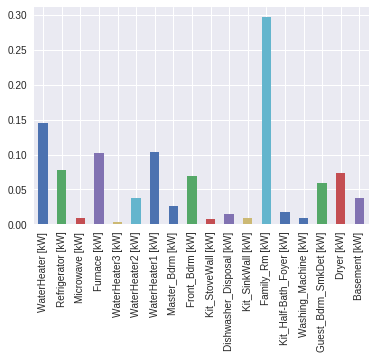

In [0]:
df.iloc[:,2:-2].mean().plot(kind='bar')

##Feature 1: season

In [0]:
season = np.array_split(df_hour,4)
  

##Feature 2: month

In [0]:
month = np.array_split(df_hour, 12)


,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-12-01 12:00:00,0.490264,5.330803,0.002055,5.330803,0.067780,0.002642,0.009437,0.000479,0.000138,0.001575,...,0.000386,0.005269,0.114588,0.017079,0.002144,0.044167,0.002941,0.028804,0.226819,0.263445
2016-12-01 13:00:00,0.984010,3.067717,0.005479,3.067717,0.096817,0.056870,0.009164,0.001197,0.000371,0.003911,...,0.000506,0.005929,0.555769,0.016736,0.002378,0.041953,0.002974,0.027223,0.239591,0.744419
2016-12-01 14:00:00,0.914773,0.488122,0.005040,0.488122,0.066311,0.059504,0.008779,0.001284,0.000487,0.003269,...,0.000486,0.006836,0.544551,0.017641,0.002306,0.042734,0.002831,0.027665,0.175692,0.739082
2016-12-01 15:00:00,1.136726,0.059757,0.006869,0.059757,0.082029,0.002738,0.008654,0.001742,0.000624,0.004503,...,0.001174,0.007544,0.536910,0.016725,0.002148,0.045269,0.002713,0.297968,0.184290,0.952436
2016-12-01 16:00:00,1.472473,0.007287,0.010896,0.007287,0.081668,0.088103,0.009068,0.003013,0.001476,0.006407,...,0.000959,0.007111,0.628187,0.027039,0.239362,0.048562,0.002737,0.298664,0.193096,1.279376
2016-12-01 17:00:00,3.664672,0.005295,0.013554,0.005295,0.143363,0.133945,0.009148,0.004022,0.002126,0.007407,...,0.001134,0.010436,0.653529,0.034377,0.001911,0.039845,1.646636,0.284787,1.252111,2.412561
2016-12-01 18:00:00,5.383760,0.006068,0.009042,0.006068,0.122482,0.015806,0.154416,0.002898,0.001278,0.004930,...,0.000724,0.007336,0.554017,0.058096,0.002237,0.067662,0.147177,0.311153,2.379606,3.004154
2016-12-01 19:00:00,5.108550,0.006439,0.007783,0.006439,0.106946,0.002849,0.113835,0.002591,0.001002,0.004219,...,0.001430,0.007351,0.479457,0.042872,0.002331,0.053609,0.002991,0.305858,2.313974,2.794576
2016-12-01 20:00:00,5.099317,0.006209,0.008842,0.006209,0.087324,0.003086,0.141244,0.002894,0.001177,0.004773,...,0.000666,0.007320,0.551782,0.016593,0.002348,0.043630,0.002856,0.305276,2.267252,2.832065


### Preprocess


In [0]:
split = 24*20
X = m12h
X_train = m12h.iloc[:split,4:-2].values
y_train = m12h.iloc[:split,0].values

X_test = m12h.iloc[split:,4:-2].values
y_test = m12h.iloc[split:,0].values

y_train = m12h.iloc[:split,0].values
y_test = m12h.iloc[split:,0].values

In [0]:
split = 24*20
training_set = m12h.iloc[:split,0:1].values
test_set = m12h.iloc[split:,0:1].values


In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [0]:
X_train = []
y_train = []
for i in range(24,480):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(24,217):
    X_test.append(test_set_scaled[i-24:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))

# DNN:

In [0]:
model = Sequential()
model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 24))
model.add(Dense(output_dim = 35, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=20, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=35, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [0]:
model.fit(X_train, y_train, batch_size = 6, nb_epoch = 10, shuffle=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])
prediction = sc.inverse_transform(prediction)


In [0]:
plt.figure(1)
plt.plot(test_set[:120],label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('120 Hour Prediction  ')

In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


#LSTM

LSTM with 100 neurons in the first visible layer
The final output is the Energy usage 
Start

##LSTM Data Preparation

Scaling:

In [0]:
split = 24*20
#Train
X_train = m12h.iloc[:split,4:-2].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,4:-2].values
y_test = m12h.iloc[split:,0].values


In [0]:
print('y_test:', y_test.shape)
print('X_train:' , X_train.shape)


y_test: (217,)
X_train: (480, 17)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


##Model:

In [0]:
X_train.shape

(480, 17, 1)

In [0]:
model = Sequential()
layers = [1, 50,100, 1]


In [0]:
model.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layers[2],return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(layers[3]))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 10


In [0]:
model.fit(X_train, y_train,batch_size=16, nb_epoch=epochs, validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 456 samples, validate on 24 samples
Epoch 1/10
456/456 [==============================] - 2s 5ms/step - loss: 1.5859 - acc: 0.0000e+00 - val_loss: 2.6187 - val_acc: 0.0000e+00
Epoch 2/10
456/456 [==============================] - 1s 2ms/step - loss: 1.3707 - acc: 0.0000e+00 - val_loss: 2.5318 - val_acc: 0.0000e+00
Epoch 3/10
456/456 [==============================] - 1s 2ms/step - loss: 1.2550 - acc: 0.0000e+00 - val_loss: 1.8237 - val_acc: 0.0000e+00
Epoch 4/10
456/456 [==============================] - 1s 2ms/step - loss: 1.1547 - acc: 0.0000e+00 - val_loss: 2.3188 - val_acc: 0.0000e+00
Epoch 5/10
456/456 [==============================] - 1s 2ms/step - loss: 1.1305 - acc: 0.0000e+00 - val_loss: 2.1349 - val_acc: 0.0000e+00
Epoch 6/10
456/456 [==============================] - 1s 2ms/step - loss: 1.1215 - acc: 0.0000e+00 - val_loss: 2.2123 - val_acc: 0.0000e+00
Epoch 7/10
456/456 [==============================] - 1s 2ms/step - loss: 1.0027 - acc: 0.0000e+00 - val_loss: 2.20

In [0]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 1.2089778816645047
Test accuracy: 0.0


###Graph

Text(0.5, 0, 'Next 200 Hours')

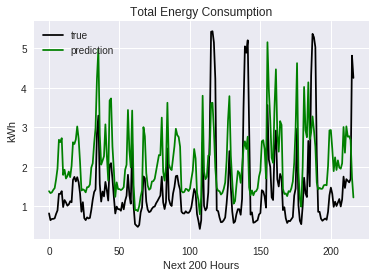

In [0]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')

Since the goal of this research is about prediction under uncertainty.  

In [0]:
split = 24*20
#Train
X_train = m12h.iloc[:split,1:15].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,1:15].values
y_test = m12h.iloc[split:,0].values


In [0]:
weather.shape

(8760, 13)

In [0]:
X_train.shape[0]

480

In [0]:
X_train_Weather = weather[-X_train.shape[0]:]
split = 24*20
#Train
X_train = m12h.iloc[:split,1:].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,1:].values
y_test = m12h.iloc[split:,0].values


## Pure time series model: No features

This would be our base model. Without any features at first. There will be only the one input layer containing the last hour Energy Consumption   
And the goal of this model is to predict the following 10 days energy consumption solely based on the time

We will not 

In [0]:
split = 24*20
#Train
training_set = m12h.iloc[:split,1:2].values
test_set = m12h.iloc[split:,1:2].values


In [0]:
training_set[0]

array([0.00958722])

Lets see what it looks like:

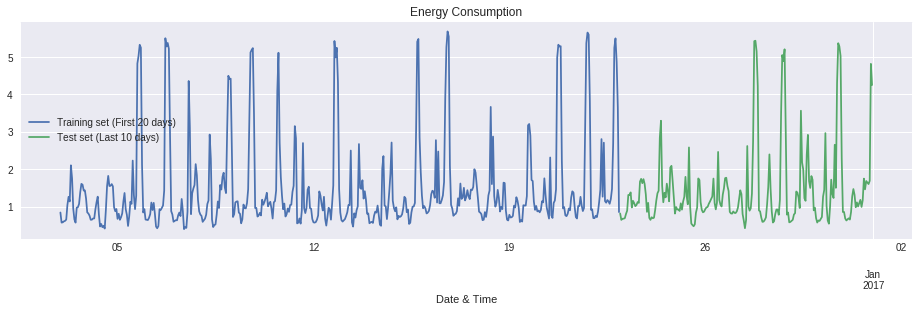

In [0]:
m12h["Usage [kW]"][:split].plot(figsize=(16,4),legend=True)
m12h["Usage [kW]"][split:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (First 20 days)','Test set (Last 10 days)'])
plt.title('Energy Consumption')
plt.show()

In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output   
So for each element of training set, we have 60 previous training set elements 


In [0]:
X_train = []
y_train = []
for i in range(80,480):
    X_train.append(training_set_scaled[i-80:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [0]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=8,batch_size=32)

Epoch 1/8
400/400 [==============================] - 6s 14ms/step - loss: 0.0611
Epoch 2/8
400/400 [==============================] - 3s 7ms/step - loss: 0.0561
Epoch 3/8
400/400 [==============================] - 3s 7ms/step - loss: 0.0513
Epoch 4/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0485
Epoch 5/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0454
Epoch 6/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0450
Epoch 7/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0431
Epoch 8/8
400/400 [==============================] - 3s 7ms/step - loss: 0.0412


In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [0]:
X_test = []
for i in range(80,278):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0.5, 0, 'Next 200 Hours')

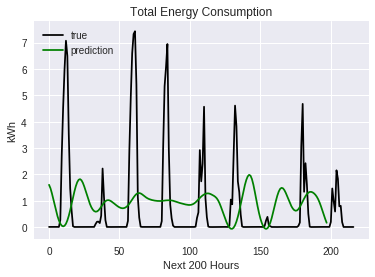

In [0]:
plt.figure(1)
plt.plot(test_set,label='true',color = 'black')
plt.plot(predicted_stock_price,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')

###Graph

In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [0]:
X_test = []
for i in range(80,278):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0.5, 0, 'Next 200 Hours')

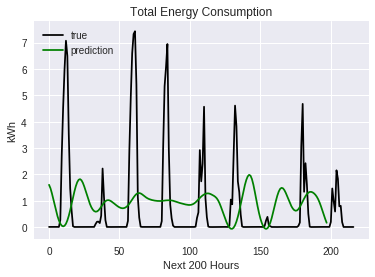

In [0]:
plt.figure(1)
plt.plot(test_set,label='true',color = 'black')
plt.plot(predicted_stock_price,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')